In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
# from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from sklearn.metrics import confusion_matrix, classification_report

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 13, 13, 2048)      23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 25688963 (98.00 MB)
Trainable params: 2101251 (8.02 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [2]:
data_directory = 'dataset' #directory path
image_height = 400
image_width = 400
batch_size = 32
validation_split = 0.2  # 20% of the training data will be used for validation

print("Loading Training Dataset......")
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_directory, #directory path
    labels='inferred',#labels are generated from the directory structure
    label_mode='categorical', # categorical vector
    validation_split=validation_split, # tells to reserve portion of this size
    subset="training", # This selects the training subset
    seed=48, # Set a seed for shuffling and split consistency
    image_size=(image_height, image_width),
    batch_size=batch_size
)


print("Loading Validation Dataset......")
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_directory, #directory path
    labels='inferred',# labels are generated from the directory structure
    label_mode='categorical', #categorical vector
    validation_split=validation_split, #split size
    subset="validation", # This selects the validation split portion
    seed=48, # seed for consistent splitting
    image_size=(image_height, image_width),
    batch_size=batch_size
)



Loading Training Dataset...
Found 344 files belonging to 3 classes.
Using 276 files for training.
Loading Validation Dataset...
Found 344 files belonging to 3 classes.
Using 68 files for validation.


In [ ]:
# Using ResNet pre-trained model 
num_classes = 3
image_shape = (400, 400, 3) # Example: CIFAR-10 image size

# 1. Load the Pre-trained ResNet50 Model
# 'weights'='imagenet' loads weights trained on ImageNet.
# 'include_top'=False removes the model's final classification layer.
base_model = ResNet50(
    weights='imagenet', 
    include_top=False, 
    input_shape=image_shape
)

# 2. Freeze the base model layers
# This prevents the pre-trained weights from being updated during the first training phase.
base_model.trainable = False

# 3. Build the new model on top of the base
model = Sequential([
    base_model,
    GlobalAveragePooling2D(), # Efficiently reduces the spatial dimensions
    Dense(1024, activation='relu'),
    Dense(num_classes, activation='softmax') #output layer
])

In [ ]:
# 4. Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
# 5. Model Summary 
model.summary()

In [4]:
epochs = 10 
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data= val_ds,
)

Epoch 1/10
9/9 [==============================] - 97s 11s/step - loss: 0.8526 - accuracy: 0.6341 - val_loss: 0.5113 - val_accuracy: 0.8824
Epoch 2/10
9/9 [==============================] - 90s 10s/step - loss: 0.3376 - accuracy: 0.9674 - val_loss: 0.2764 - val_accuracy: 0.9412
Epoch 3/10
9/9 [==============================] - 93s 11s/step - loss: 0.1714 - accuracy: 0.9928 - val_loss: 0.2064 - val_accuracy: 0.9559
Epoch 4/10
9/9 [==============================] - 87s 10s/step - loss: 0.1034 - accuracy: 0.9964 - val_loss: 0.1484 - val_accuracy: 0.9559
Epoch 5/10
9/9 [==============================] - 88s 10s/step - loss: 0.0708 - accuracy: 0.9964 - val_loss: 0.1420 - val_accuracy: 0.9559
Epoch 6/10
9/9 [==============================] - 88s 10s/step - loss: 0.0533 - accuracy: 0.9964 - val_loss: 0.1036 - val_accuracy: 0.9706
Epoch 7/10
9/9 [==============================] - 88s 10s/step - loss: 0.0402 - accuracy: 0.9964 - val_loss: 0.0988 - val_accuracy: 0.9706
Epoch 8/10
9/9 [===========

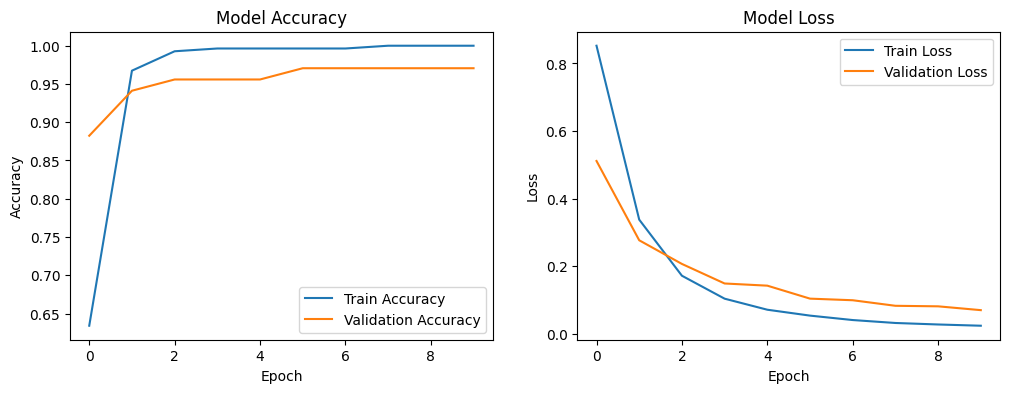

In [5]:
# Plotting the loss and accuracy for every epochs
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    
    plt.show()

plot_history(history)

In [7]:
model.save('ResNet.h5') #saved train model 

C:\Users\Divyank\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [91]:
test_directory = 'test_images' #directory path

In [92]:
image_height = 400
image_width = 400
batch_size = 32

In [93]:
import os

In [94]:
x = os.listdir(test_directory)

In [95]:
from PIL import Image

In [113]:
# 1 - pikachu 
# 2 - plusle
# 0 - minun
# TESTING THE 10 SAMPLE DATA
list_of_output = []
for i in x:
    dic_class = {
        0: "Minun",
        1: "Pikachu",
        2: "Plusle"
    }
    image_path = 'test_images/'+i #directory of images
    img = Image.open(image_path) 
    new_size = (400, 400) #new size
    img = img.convert('RGB') #making 3 channels
    resized_img = img.resize(new_size)  #assign new size
    arr = np.array(resized_img) # convert into nd array
    expected_shape = (-1, 400, 400, 3) #shape of input layers used for training
    arr_reshaped = arr.reshape(expected_shape) #reshape as input 
    pred = model.predict(arr_reshaped) #predicting
    pred_prob = pred.argmax()
    if pred_prob in dic_class.keys():
        list_of_output.append(dic_class[pred_prob])

1/1 [==============================] - 0s 321ms/step


In [114]:
test_sample_actual_output = ["Pikachu","Pikachu","Minun","Minun","Minun","Plusle","Pikachu","Plusle","Pikachu","Plusle"] #actual output

In [115]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 400, 400, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [121]:
train_ds.element_spec[0].shape #shape of trained data input

TensorShape([None, 400, 400, 3])

In [120]:
list_of_output[0:3] #predicted outputs

['Pikachu', 'Plusle', 'Plusle']

In [118]:
for m in range(len(list_of_output)): #Comparison
    if list_of_output[m] == test_sample_actual_output[m]:
        print("Correct")
    else:
        print("Wrong")

Correct
Wrong
Wrong
Wrong
Correct
Correct
Wrong
Correct
Correct
Correct


In [122]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report

In [134]:
# Can determine the performance based on 10 sample , but this are confusing images we got but it has less quantity.
cm = confusion_matrix(test_sample_actual_output,list_of_output)
print(cm)

[[1 0 2]
 [0 2 2]
 [0 0 3]]


In [133]:
report = classification_report(
    test_sample_actual_output,
    list_of_output,
)
print(report)

              precision    recall  f1-score   support

       Minun       1.00      0.33      0.50         3
     Pikachu       1.00      0.50      0.67         4
      Plusle       0.43      1.00      0.60         3

    accuracy                           0.60        10
   macro avg       0.81      0.61      0.59        10
weighted avg       0.83      0.60      0.60        10

